In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-prediction-binary-classification/corona.csv


Importing Libararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2024-08-16 15:09:50.076988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:09:50.077176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:09:50.283535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Importing Data

In [3]:
data = pd.read_csv("/kaggle/input/covid-19-prediction-binary-classification/corona.csv")

In [4]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [5]:
df = data.copy()

Exploratory Data

In [6]:
data.head(15)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
5,6,11-03-2020,True,False,False,False,False,other,NaN,NaN,Contact with confirmed
6,7,11-03-2020,False,False,False,False,False,negative,NaN,NaN,Other
7,8,11-03-2020,False,True,False,False,False,negative,NaN,NaN,Abroad
8,9,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
9,10,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad


In [7]:
data.tail(15)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278833,278834,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278834,278835,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278835,278836,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278836,278837,30-04-2020,False,False,False,False,False,positive,NaN,NaN,Other
278837,278838,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278838,278839,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278839,278840,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278840,278841,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278841,278842,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278842,278843,30-04-2020,False,False,False,False,False,positive,NaN,NaN,Other


In [8]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [10]:
data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [11]:
pd.DataFrame(data.Corona.value_counts())

,count
Corona,
negative,260227
positive,14729
other,3892


In [12]:
pd.DataFrame(data.Test_date.value_counts())

,count
Test_date,
20-04-2020,10921
19-04-2020,10199
22-04-2020,9646
21-04-2020,9624
16-04-2020,9138
23-04-2020,8744
01-04-2020,8654
13-04-2020,8425
02-04-2020,8188


In [13]:
data["Known_contact"].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [14]:
data.duplicated().sum()

0

Feature Engneering

Handling Missing Data

In [15]:
missing_data = data.isnull().sum()
missing_data

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [16]:
data.shape

(278848, 11)

In [17]:
missing_data / data.shape[0]

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000904
Fever                  0.000904
Sore_throat            0.000004
Shortness_of_breath    0.000004
Headache               0.000004
Corona                 0.000000
Age_60_above           0.456593
Sex                    0.070157
Known_contact          0.000000
dtype: float64

In [18]:
row_nan_count = data.isna().sum(axis=1)
print(row_nan_count)

0         2
1         2
2         2
3         2
4         2
         ..
278843    1
278844    1
278845    1
278846    1
278847    1
Length: 278848, dtype: int64


Cough_symptoms

In [19]:
data["Cough_symptoms"].value_counts()

Cough_symptoms
False    236368
True      42228
Name: count, dtype: int64

In [20]:
data["Cough_symptoms"].fillna(method = "ffill",inplace=True)

In [21]:
pd.DataFrame(data.Cough_symptoms.value_counts())

,count
Cough_symptoms,
False,236598
True,42250


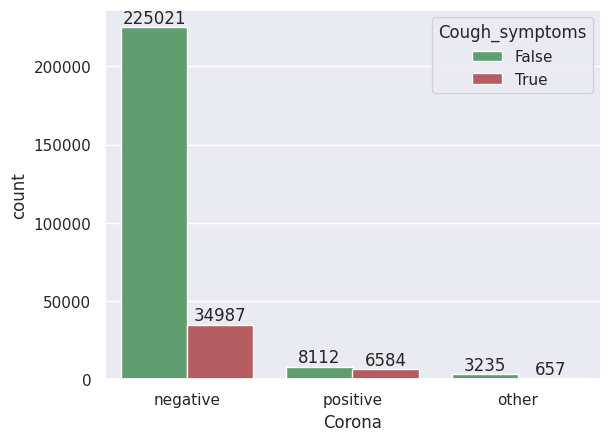

In [22]:
ax = sns.countplot( x= "Corona", data=df, palette=["g","r"],hue="Cough_symptoms")

for bars in ax.containers:
    ax.bar_label(bars)


Fever                     

In [23]:
data["Fever"].value_counts()

Fever
False    256844
True      21752
Name: count, dtype: int64

In [24]:
data["Fever"].fillna(method = "ffill",inplace=True)

In [25]:
data['Fever'].value_counts()

Fever
False    257051
True      21797
Name: count, dtype: int64

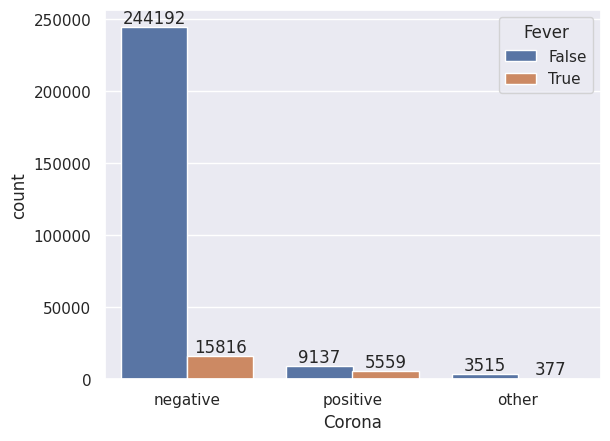

In [26]:
ax = sns.countplot( x= "Corona", data=df,hue="Fever")

for bars in ax.containers:
    ax.bar_label(bars)


In [27]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Sore_throat

In [28]:
data['Sore_throat'].value_counts()

Sore_throat
False    276921
True       1926
Name: count, dtype: int64

In [29]:
data["Sore_throat"].fillna(method = "ffill",inplace=True)

In [30]:
data['Sore_throat'].value_counts()

Sore_throat
False    276922
True       1926
Name: count, dtype: int64

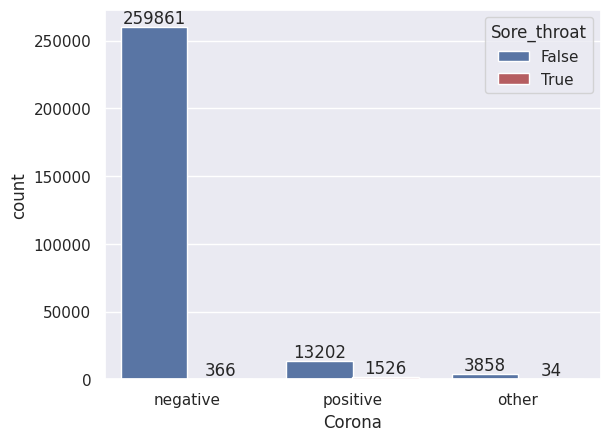

In [31]:
ax = sns.countplot( x= "Corona", data=df,palette=["b","r"],hue="Sore_throat")

for bars in ax.containers:
    ax.bar_label(bars)


In [32]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Shortness_of_breath

In [33]:
data['Sore_throat'].value_counts()

Sore_throat
False    276922
True       1926
Name: count, dtype: int64

In [34]:
data["Shortness_of_breath"].fillna(method = "ffill",inplace=True)

In [35]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

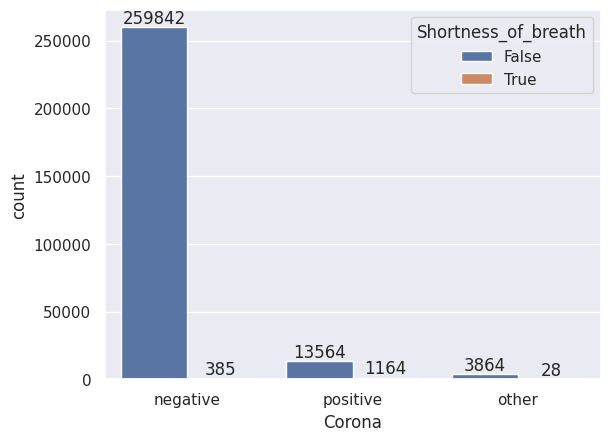

In [36]:
ax = sns.countplot( x= "Corona", data=df,hue="Shortness_of_breath")

for bars in ax.containers:
    ax.bar_label(bars)


Headache

In [37]:
data["Headache"].fillna(method = "ffill",inplace=True)

In [38]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

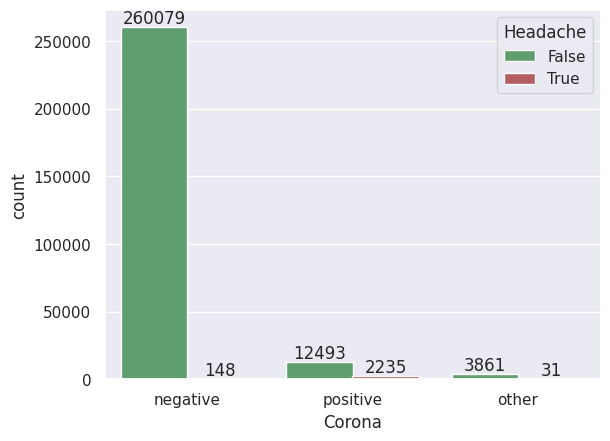

In [39]:
ax = sns.countplot( x= "Corona", data=df, palette=["g","r"],hue="Headache")

for bars in ax.containers:
    ax.bar_label(bars)


Sex

In [40]:
data["Sex"].fillna(method = "ffill",inplace=True)

In [41]:
data['Sex'].value_counts()

Sex
female    132974
male      132147
Name: count, dtype: int64

In [42]:
data["Sex"] = data["Sex"].fillna("male")

In [43]:
data['Sex'].value_counts()

Sex
male      145874
female    132974
Name: count, dtype: int64

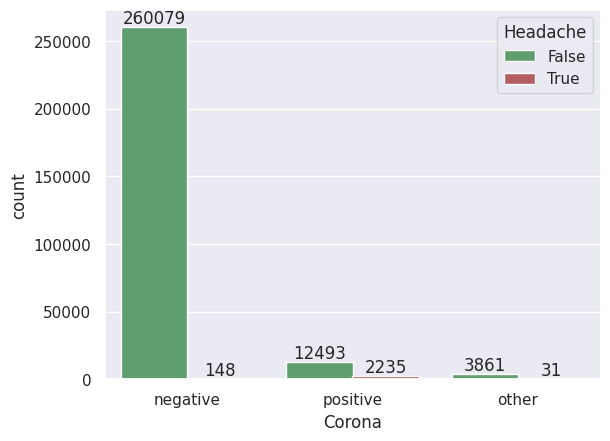

In [44]:
ax = sns.countplot( x= "Corona", data=df, palette=["g","r"],hue="Headache")

for bars in ax.containers:
    ax.bar_label(bars)


In [45]:
data.shape

(278848, 11)

In [46]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127320
Sex                         0
Known_contact               0
dtype: int64

Age_60_above

In [47]:
data["Age_60_above"].fillna(method = "ffill",inplace=True)

In [48]:
data['Age_60_above'].value_counts()

Age_60_above
No     248511
Yes     25825
Name: count, dtype: int64

In [49]:
data["Age_60_above"] = data["Age_60_above"].fillna("Yes")

In [50]:
data['Age_60_above'].value_counts()

Age_60_above
No     248511
Yes     30337
Name: count, dtype: int64

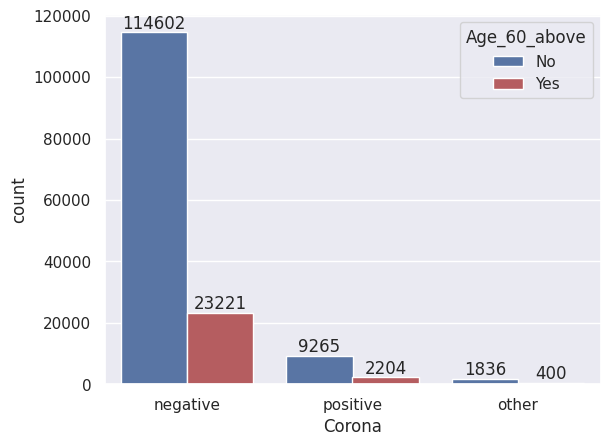

In [51]:
ax = sns.countplot( x= "Corona", data=df,palette=["b","r"],hue="Age_60_above")

for bars in ax.containers:
    ax.bar_label(bars)


In [52]:
#data.reset_index(inplace=True)
#data.drop(["index","Ind_ID"],axis=1,inplace=True)

In [53]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [54]:
data.shape

(278848, 11)

In [55]:
data_covid=data.drop(["Ind_ID","Test_date"],axis=1)

In [56]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278848 non-null  bool  
 1   Fever                278848 non-null  bool  
 2   Sore_throat          278848 non-null  bool  
 3   Shortness_of_breath  278848 non-null  bool  
 4   Headache             278848 non-null  bool  
 5   Corona               278848 non-null  object
 6   Age_60_above         278848 non-null  object
 7   Sex                  278848 non-null  object
 8   Known_contact        278848 non-null  object
dtypes: bool(5), object(4)
memory usage: 9.8+ MB


Covert category data to numarical data

In [57]:
data_corona=data_covid.apply(LabelEncoder().fit_transform)
data_corona

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,1,1,0
1,0,1,0,0,0,2,1,1,0
2,0,1,0,0,0,2,1,1,0
3,1,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,2,0,1,2
278844,0,0,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,0,1,2
278846,0,0,0,0,0,0,0,1,2


Split Data to Feature and Target

In [58]:
x = data_corona.drop(columns="Corona",axis = 1)  #features
y = data_corona["Corona"]   # target

Correlation Between Featurs and Target 

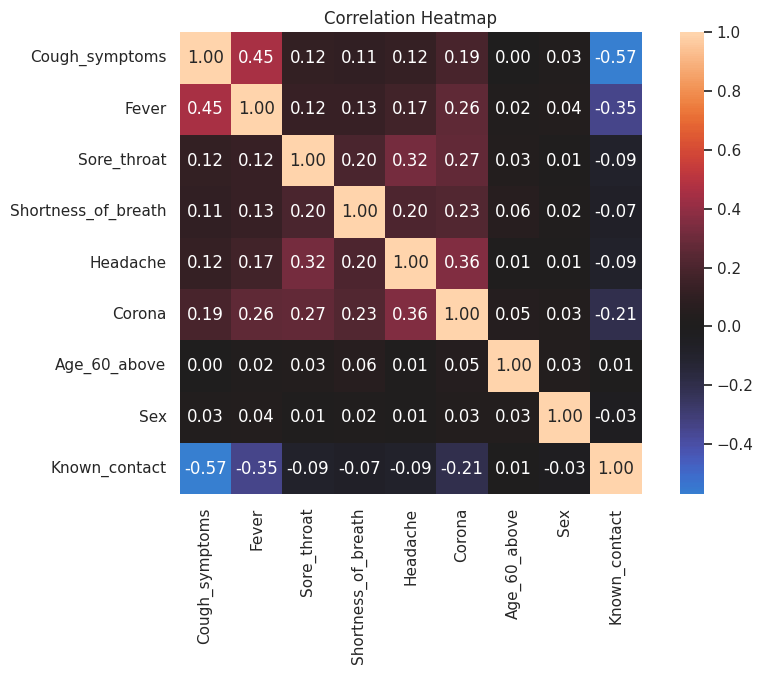

In [59]:
plt.figure(figsize=(10, 6))
corr = data_corona.corr()
sns.heatmap(corr, annot=True, fmt=".2f",
center=0,square=True)
plt.title('Correlation Heatmap')
plt.show()


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.8 , random_state = 42,shuffle=True)


In [61]:
x_train
np.array(x)

array([[1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 2]])

In [62]:
y_train
np.array(y)

array([0, 2, 2, ..., 0, 0, 0])

In [63]:
y_test
np.array(y)

array([0, 2, 2, ..., 0, 0, 0])

In [64]:
x_test
np.array(x)

array([[1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 2]])

Create ANN Model and Evaluation

In [65]:
model = Sequential()
model.add(Dense(8,input_dim=8, activation="relu"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(16,activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(3,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=20,batch_size=100,verbose=1,shuffle=True,validation_data=(x_test,y_test))

loss, accuracy = model.evaluate(x_test,y_test)
print("Test Accuracy: ", accuracy)
print("Test loss: ",loss)

Epoch 1/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9268 - loss: 0.2823 - val_accuracy: 0.9436 - val_loss: 0.2105
Epoch 2/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9459 - loss: 0.2021 - val_accuracy: 0.9487 - val_loss: 0.1946
Epoch 3/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9502 - loss: 0.1911 - val_accuracy: 0.9509 - val_loss: 0.1884
Epoch 4/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9516 - loss: 0.1880 - val_accuracy: 0.9516 - val_loss: 0.1878
Epoch 5/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9522 - loss: 0.1874 - val_accuracy: 0.9516 - val_loss: 0.1875
Epoch 6/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9524 - loss: 0.1873 - val_accuracy: 0.9518 - val_loss: 0.1866
Epoch 7/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9528 - loss: 0.1862 - val_accuracy: 0.9518 - val_loss: 0.1867
Epoch 8/20
2231/2231 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9533 - loss: 0.186

In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,755 (143.58 KB)

 Trainable params: 12,251 (47.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,504 (95.72 KB)

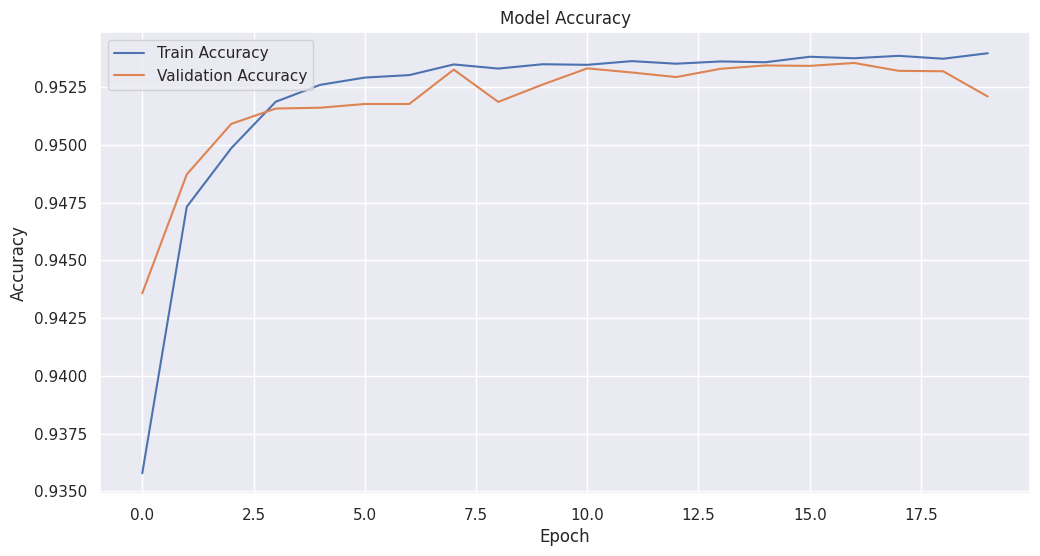

In [67]:
#Accuracy curve
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


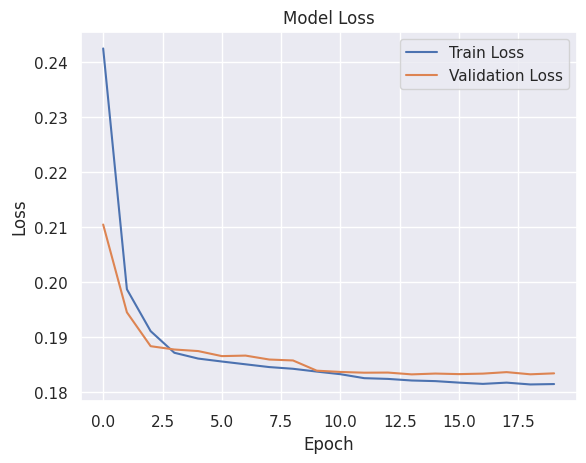

In [68]:
# Loss curve

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [69]:
predictions = model.predict(x_test)

1743/1743 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [70]:
print("predictions shape is ",format(predictions.shape))

predictions shape is  (55770, 3)


another way

In [71]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [72]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [73]:
df = df.dropna(how="any")
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [74]:
df.reset_index(inplace=True)
df.drop(["index","Ind_ID","Test_date"],axis=1,inplace=True)

In [75]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,False,False,False,negative,No,male,Abroad
1,True,False,False,False,False,negative,No,female,Abroad
2,True,True,False,False,False,positive,Yes,female,Other
3,False,False,False,False,False,other,No,female,Other
4,False,False,False,False,False,other,No,female,Other
...,...,...,...,...,...,...,...,...,...
138167,True,False,True,False,False,negative,Yes,male,Abroad
138168,True,False,True,True,False,negative,No,male,Abroad
138169,True,True,False,False,False,negative,No,female,Abroad
138170,False,False,False,False,False,negative,No,male,Other


In [76]:
df_covid=df.apply(LabelEncoder().fit_transform)
df_covid

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,2,1,0,2
3,0,0,0,0,0,1,0,0,2
4,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...
138167,1,0,1,0,0,0,1,1,0
138168,1,0,1,1,0,0,0,1,0
138169,1,1,0,0,0,0,0,0,0
138170,0,0,0,0,0,0,0,1,2


In [77]:
x = df_covid.drop(columns="Corona",axis = 1)  #features
y = df_covid["Corona"]   # target

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.75 , random_state = 42,shuffle=True)


In [79]:
x_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
33558,0,0,0,0,0,0,0,2
100861,0,0,0,0,0,0,1,2
61845,0,0,0,0,0,0,0,2
79666,0,0,0,0,1,0,0,1
35871,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,2
119879,0,0,0,0,0,0,1,2
103694,1,0,0,0,0,0,1,2
131932,1,0,0,0,0,0,0,0


In [80]:
pd.DataFrame(x_test)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
1441,0,0,0,0,0,1,1,2
92168,0,0,0,0,0,0,0,2
77172,0,0,0,0,0,0,0,2
75556,1,1,0,1,1,0,0,1
65070,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
110476,0,0,0,0,0,0,0,2
87055,1,0,0,0,0,0,1,2
130906,1,1,0,0,0,0,0,0
122525,0,0,0,0,0,0,1,2


In [81]:
pd.DataFrame(y_train)

,Corona
33558,0
100861,0
61845,0
79666,2
35871,0
...,...
110268,0
119879,0
103694,0
131932,0


In [82]:
pd.DataFrame(y_test)

,Corona
1441,0
92168,0
77172,0
75556,2
65070,0
...,...
110476,0
87055,0
130906,0
122525,0


Create ANN Model and Evaluation

In [83]:
model = Sequential()
model.add(Dense(8,input_dim=8, activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(16,activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(3,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1 = model.fit(x_train,y_train,epochs=30,batch_size=300,shuffle=True,verbose=1,validation_data=(x_test,y_test))

loss, accuracy = model.evaluate(x_test,y_test)
print("Test Accuracy: ", accuracy)

Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9077 - loss: 0.3620 - val_accuracy: 0.9357 - val_loss: 0.2217
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9341 - loss: 0.2265 - val_accuracy: 0.9418 - val_loss: 0.2096
Epoch 3/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9413 - loss: 0.2145 - val_accuracy: 0.9449 - val_loss: 0.2057
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9425 - loss: 0.2084 - val_accuracy: 0.9455 - val_loss: 0.2050
Epoch 5/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9433 - loss: 0.2097 - val_accuracy: 0.9454 - val_loss: 0.2050
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9432 - loss: 0.2085 - val_accuracy: 0.9454 - val_loss: 0.2047
Epoch 7/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9439 - loss: 0.2092 - val_accuracy: 0.9454 - val_loss: 0.2058
Epoch 8/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9441 - loss: 0.2072 - val_accuracy: 0.

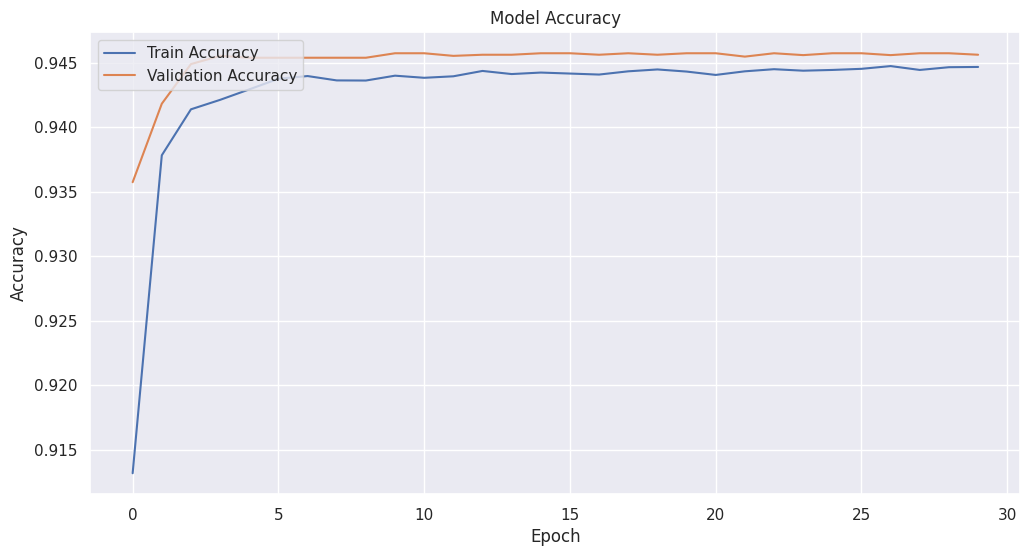

In [84]:
#Accuracy curve
plt.figure(figsize=(12, 6))

plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


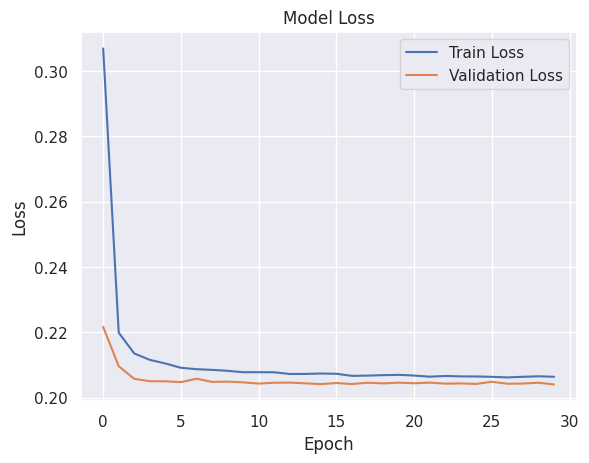

In [85]:
# Loss curve

plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

THANK YOU